In [116]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [117]:
df= pd.read_csv('Subscription Data Capstone Project.csv')

In [118]:
df.head()

,User_ID,Subscription_Type,Join_Date,Churn_Flag,Age,Gender,Monthly_Viewing_Hours,Genres_Watched,Support_Tickets,Discount_Used,Payment_Method,Auto_Renew_Enabled,Last_Login_Date,Number_of_Devices
0,1917ba4a-9eb2-4737-adf6-52c68429e60d,Standard,28/08/2024,1,64,Other,56.3,7,2,No,Credit Card,Yes,30/04/2025,3
1,a7dddc1b-317d-4261-8f21-997c9188561f,Premium,25/09/2023,0,29,M,31.3,4,1,Yes,Mobile Money,No,11/4/2025,3
2,99ba7fe2-b0f5-43ec-9501-93260544723d,Free Trial,3/11/2024,0,33,F,47.2,6,1,No,Credit Card,No,13/04/2025,1
3,e43ac1e7-6d1e-4c72-a71a-76ef31a6ced6,Standard,19/08/2024,0,41,F,81.0,4,0,Yes,Mobile Money,Yes,21/04/2025,4
4,d55d7e3f-b956-4423-b9da-3fc1eef1c0ef,Standard,4/5/2025,0,36,Other,45.7,6,3,No,PayPal,No,3/5/2025,5


In [119]:
df.shape

(1000, 14)

In [120]:
df.describe

<bound method NDFrame.describe of                                   User_ID Subscription_Type   Join_Date  \
0    1917ba4a-9eb2-4737-adf6-52c68429e60d          Standard  28/08/2024   
1    a7dddc1b-317d-4261-8f21-997c9188561f           Premium  25/09/2023   
2    99ba7fe2-b0f5-43ec-9501-93260544723d        Free Trial   3/11/2024   
3    e43ac1e7-6d1e-4c72-a71a-76ef31a6ced6          Standard  19/08/2024   
4    d55d7e3f-b956-4423-b9da-3fc1eef1c0ef          Standard    4/5/2025   
..                                    ...               ...         ...   
995  c7b4db1d-92c6-4f79-8468-951d2ef9869e        Free Trial  30/12/2023   
996  ee55c59d-de20-4093-bd5f-813483467238        Free Trial  22/12/2024   
997  58cab762-2160-4e34-b4c2-7bb888bc7e8d           Premium    7/4/2025   
998  bae2ad8e-07d0-4246-8d35-aabb6b901603           Premium  14/08/2023   
999  9d6e108e-ad19-4728-869b-9e2472e4cd6a          Standard    5/4/2024   

     Churn_Flag  Age Gender  Monthly_Viewing_Hours  Genres_Watche

In [121]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [122]:
df.isnull().sum()

User_ID                  0
Subscription_Type        0
Join_Date                0
Churn_Flag               0
Age                      0
Gender                   0
Monthly_Viewing_Hours    0
Genres_Watched           0
Support_Tickets          0
Discount_Used            0
Payment_Method           0
Auto_Renew_Enabled       0
Last_Login_Date          0
Number_of_Devices        0
dtype: int64

In [123]:
# Convert the Join_Date and Last_Login_Date columns from string to date datatypes

df['Join_Date'] = pd.to_datetime(df['Join_Date'])

df['Last_Login_Date'] = pd.to_datetime(df['Last_Login_Date'])

C:\Users\USER\AppData\Local\Temp\ipykernel_7228\1181146078.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Join_Date'] = pd.to_datetime(df['Join_Date'])
C:\Users\USER\AppData\Local\Temp\ipykernel_7228\1181146078.py:5: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Last_Login_Date'] = pd.to_datetime(df['Last_Login_Date'])


In [124]:
df.head()

,User_ID,Subscription_Type,Join_Date,Churn_Flag,Age,Gender,Monthly_Viewing_Hours,Genres_Watched,Support_Tickets,Discount_Used,Payment_Method,Auto_Renew_Enabled,Last_Login_Date,Number_of_Devices
0,1917ba4a-9eb2-4737-adf6-52c68429e60d,Standard,2024-08-28,1,64,Other,56.3,7,2,No,Credit Card,Yes,2025-04-30,3
1,a7dddc1b-317d-4261-8f21-997c9188561f,Premium,2023-09-25,0,29,M,31.3,4,1,Yes,Mobile Money,No,2025-04-11,3
2,99ba7fe2-b0f5-43ec-9501-93260544723d,Free Trial,2024-11-03,0,33,F,47.2,6,1,No,Credit Card,No,2025-04-13,1
3,e43ac1e7-6d1e-4c72-a71a-76ef31a6ced6,Standard,2024-08-19,0,41,F,81.0,4,0,Yes,Mobile Money,Yes,2025-04-21,4
4,d55d7e3f-b956-4423-b9da-3fc1eef1c0ef,Standard,2025-05-04,0,36,Other,45.7,6,3,No,PayPal,No,2025-05-03,5


In [125]:
df['Tenure_Days'] = (pd.Timestamp.today() - df['Join_Date']).dt.days
df['Days_Since_Last_Login'] = (pd.Timestamp.today() - df['Last_Login_Date']).dt.days
df['Discount_Used'] = df['Discount_Used'].map({'Yes': 1, 'No': 0})
df['Auto_Renew_Enabled'] = df['Auto_Renew_Enabled'].map({'Yes': 1, 'No': 0})

In [126]:
df=df.drop(columns=['Join_Date','Last_Login_Date'])

In [127]:
df.head()

,User_ID,Subscription_Type,Churn_Flag,Age,Gender,Monthly_Viewing_Hours,Genres_Watched,Support_Tickets,Discount_Used,Payment_Method,Auto_Renew_Enabled,Number_of_Devices,Tenure_Days,Days_Since_Last_Login
0,1917ba4a-9eb2-4737-adf6-52c68429e60d,Standard,1,64,Other,56.3,7,2,0,Credit Card,1,3,278,33
1,a7dddc1b-317d-4261-8f21-997c9188561f,Premium,0,29,M,31.3,4,1,1,Mobile Money,0,3,616,52
2,99ba7fe2-b0f5-43ec-9501-93260544723d,Free Trial,0,33,F,47.2,6,1,0,Credit Card,0,1,211,50
3,e43ac1e7-6d1e-4c72-a71a-76ef31a6ced6,Standard,0,41,F,81.0,4,0,1,Mobile Money,1,4,287,42
4,d55d7e3f-b956-4423-b9da-3fc1eef1c0ef,Standard,0,36,Other,45.7,6,3,0,PayPal,0,5,29,30


In [ ]:
df['Estimated_Login_Frequency'] = df['Tenure_Days'] - df['Days_Since_Last_Login']
print('Estimated_Login_Frequency')

Estimated_Login_Frequency


1.	What is the overall churn rate?

In [128]:
 # Count total customers
Total_customers= len(df)
print(Total_customers)

1000


In [129]:
#Count churned customers (where churn_flag = 1)
churned_customers = df['Churn_Flag'].sum()
print(churned_customers)

474


In [130]:
Overall_churn_rate= (churned_customers/Total_customers)
print(Overall_churn_rate)

0.474


In [131]:
# Calculate churn rate as percentage
Churn_rate= (churned_customers/Total_customers)*100
print(Churn_rate)

47.4


In [132]:
Churn_rate= (Overall_churn_rate)* 100
print(Churn_rate)

47.4


2.	How does churn vary by subscription type

In [151]:
churn_by_subscription= df.groupby('Subscription_Type')['Churn_Flag'].mean().sort_values(ascending=False)*100
print(churn_by_subscription)

Subscription_Type
Premium       48.571429
Standard      47.413793
Free Trial    46.899225
Basic         46.521739
Name: Churn_Flag, dtype: float64


3.	Is there a relationship between age and churn?

C:\Users\USER\AppData\Local\Temp\ipykernel_7228\2330307816.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x='Churn_Flag', y='Age', palette= 'pastel')


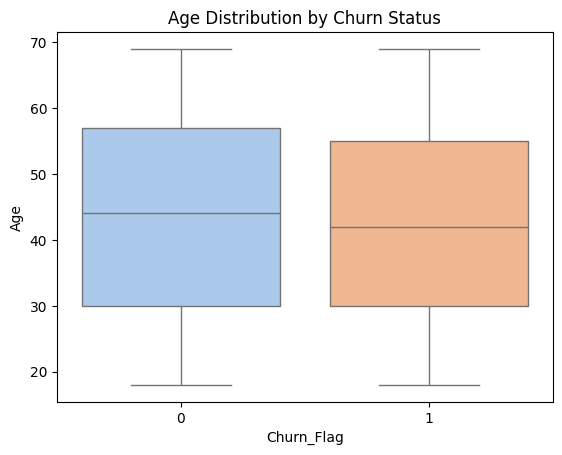

In [134]:
sns.boxplot(data=df,x='Churn_Flag', y='Age', palette= 'pastel')
plt.title('Age Distribution by Churn Status')
plt.show()

4.	Do support tickets correlate with higher churn?

In [148]:
df.groupby('Churn_Flag')['Support_Tickets'].count()


Churn_Flag
0    526
1    474
Name: Support_Tickets, dtype: int64

C:\Users\USER\AppData\Local\Temp\ipykernel_7228\1247397378.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x='Churn_Flag', y='Support_Tickets', palette= 'pastel')


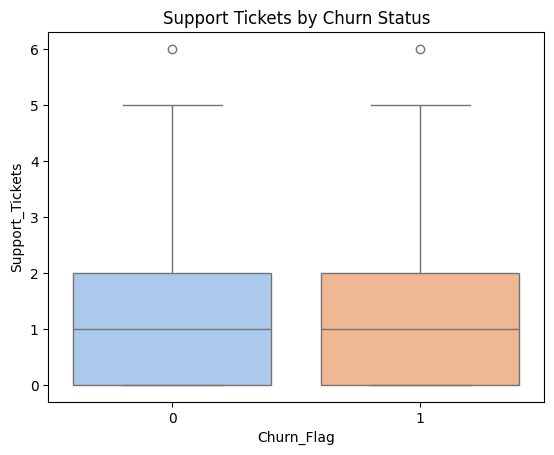

In [136]:
sns.boxplot(data=df,x='Churn_Flag', y='Support_Tickets', palette= 'pastel')
plt.title('Support Tickets by Churn Status')
plt.show()

5.	How does viewing behavior differ between churned and retained customers?

In [137]:
churned = df[df['Churn_Flag'] == 1]['Monthly_Viewing_Hours']
retained = df[df['Churn_Flag'] == 0]['Monthly_Viewing_Hours']

In [138]:
Average_viewing_hours=churned.mean()
Average_viewing_hours_retained=retained.mean()
print(Average_viewing_hours)
print(Average_viewing_hours_retained)

39.43291139240507
40.255323193916354


6.	Is there a "critical period" after sign-up when churn risk is highest?

In [139]:
#Average tenure
avg_churned = df[df['Churn_Flag'] == 1]['Tenure_Days'].mean()
avg_retained = df[df['Churn_Flag'] == 0]['Tenure_Days'].mean()
print(avg_churned)
print(avg_retained)

380.05274261603375
393.787072243346


7.	Does payment method affect churn probability?

In [144]:
# Calculate churn rate by payment method
churn_by_payment = df.groupby('Payment_Method')['Churn_Flag'].mean().reset_index()*100
print(churn_by_payment)


                                      Payment_Method  Churn_Flag
0  Credit CardCredit CardCredit CardCredit CardCr...   46.428571
1  Mobile MoneyMobile MoneyMobile MoneyMobile Mon...   47.747748
2  PayPalPayPalPayPalPayPalPayPalPayPalPayPalPayP...   48.036254


8.	How does the use of discounts at sign-up relate to long-term retention?

In [ ]:
# Churn rate by discount usage
churn_by_discount = df.groupby('Discount_Used')['Churn_Flag'].count().reset_index()
print(churn_by_discount)

   Discount_Used  Churn_Flag
0              0         493
1              1         507


In [161]:
churn_by_discount = df.groupby('Discount_Used')['Churn_Flag'].mean().reset_index()*100
print(churn_by_discount)

   Discount_Used  Churn_Flag
0              0   50.304260
1            100   44.575937
